## **Importa bibliotecas**

In [1]:
import numpy as np
import statistics
from scipy import stats
import math

## **Carrega o Conjunto de Dados (dataset)**


In [2]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

# **Medidas de Tendência Central**
Valor de um conjunto de dados (dataset) que representa uma entrada típica ou central

## **Média Aritmética Simples**

In [3]:
#calculando média manualmente
dados.sum() / len(dados)

160.375

In [4]:
#calculando a média usando função do NumPy
dados.mean()

160.375

In [5]:
#calculando a média usando pacote "statistics" do Python
statistics.mean(dados)

160

## **Moda**

In [6]:
#calculando a moda usando pacote "statistics" do Python
statistics.mode(dados)

160

In [7]:
#calculando a moda usando pacote "stats" do ScyPy
stats.mode(dados)

ModeResult(mode=160, count=5)

## **Mediana**

In [8]:
#número de elementos no dataset é ímpar
#os dados devem estar ordenados
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

***Mediana - Cálculo manual (número ímpar de elementos)***

In [9]:
posicao = len(dados_impar) / 2
posicao

4.5

In [10]:
#arredonda para cima
posicao = math.ceil(posicao)
posicao

5

In [11]:
#subtrai 1 de posicao porque o índice inicia em zero (0)
dados_impar[posicao - 1]

153

***Mediana - Cálculo manual (número par de elementos)***

In [12]:
#calcula número de elementos do dataset
len(dados)

40

In [13]:
#calcula a divisão inteira (//)
posicao = len(dados) // 2
posicao

20

In [14]:
#índice inicia em 0, por isto subtrai
#com isto se obtém os dois elmentos centrais do dataset
dados[posicao - 1], dados[posicao]

(160, 160)

In [15]:
#mediana é a média aritmética dos dois elementos centrais
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

160.0

**Mediana - cálculo com as bibliotecas**

In [16]:
np.median(dados_impar)

153.0

In [17]:
np.median(dados)

160.0

In [18]:
statistics.median(dados_impar)

153

In [19]:
statistics.median(dados)

160.0

## **Média aritmética ponderada**

In [20]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [21]:
(9 * 1 + 8 * 2 + 7 * 3 + 3 * 4) / (1 + 2 + 3 + 4)

5.8

In [22]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
media_ponderada

5.8

In [23]:
np.average(notas, weights=pesos)

5.8

## **Média aritmética, moda e mediana de uma distribuição de frequência (DF)**

In [24]:
#dicionário com intervalos inferior e superior (i.e. classes)
#fi = frequência absoluta
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [25]:
#importa biblioteca Pandas
#converte o dataset em um DataFrame do Pandas
import pandas as pd
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [26]:
#calcula "xi" que é o Ponto Médio dos intervalos
#e acrescenta esta coluna no DataFrame
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [27]:
#calcula "fi.xi" que é o produto da frequência absoluta com o ponto médio
#e acrescenta este produto como uma coluna no DataFrame
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [28]:
#cria uma coluna para frequência acumulada ('Fi')
# e inicializa os valores dela com zero (0)
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [29]:
#calcula a frequência acumulada
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])  #imprime a linha do DataFrame
  #print(linha[1][2])  #imprime a coluna "fi" do Data Frame
  #acumula o valor da "fi"
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

/tmp/ipykernel_22386/2769060409.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  somatorio += linha[1][2]


In [30]:
frequencia_acumulada

[5.0, 14.0, 25.0, 32.0, 37.0, 40.0]

In [31]:
#acrescenta a lista acima como uma coluna ("Fi") no DataFrame
dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


**Média da Distribuição de Frequência**

In [32]:
#calcula os totais das colunas "fi" e "fi.xi"
dataset['fi'].sum(), dataset['fi.xi'].sum()

(40, 6428.0)

In [33]:
#calcula a média da distribuição de frequência
dataset['fi.xi'].sum() / dataset['fi'].sum()

160.7

**Moda da Distribuição de Frequência**

In [34]:
#calcula a moda da DF
#é o valor da frequência ("fi"") que mais se repete
dataset['fi'].max()

11

In [35]:
#usa um filtro para obter a linha da "fi" que mais se repete
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25.0


In [36]:
#usa um filtro para obter o valor de "xi"
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

160.0

**Mediana da Distribuição de Frequência**

In [37]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [38]:
fi_2 = dataset['fi'].sum() / 2
fi_2

20.0

In [39]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
for linha in dataset.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
    break

/tmp/ipykernel_22386/1957191632.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior = linha[1][0]
/tmp/ipykernel_22386/1957191632.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencia_classe = linha[1][2]
/tmp/ipykernel_22386/1957191632.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if linha[1][5] >= fi_2:


In [40]:
limite_inferior, frequencia_classe, id_frequencia_anterior

(158.0, 11.0, 1)

In [41]:
Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
Fi_anterior

14.0

In [42]:
#md = li + ((∑fi/2 - Fiant) * LC) / fi
#md = mediana
#li = limite inferior do intervalo
#∑fi/2 = ponto médio de uma classe (intervalo)
#Fiant = frequência acumulada da classe anterior
#LC = largura da classe (no caso = 4)
#fi = frequência absoluta da classe
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

160.1818181818182

**Função completa**

In [43]:
#função para calcular todos os passos manuais acima
def get_estatisticas(dataframe):
  media = dataset['fi.xi'].sum() / dataset['fi'].sum()
  moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

  fi_2 = dataset['fi'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(dataset.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  #retorna a média, a moda e a mediana
  return media, moda, mediana

In [44]:
#chama a função passando o dataset para efetuar os cálculos
get_estatisticas(dataset)

/tmp/ipykernel_22386/2571345545.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior = linha[1][0]
/tmp/ipykernel_22386/2571345545.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencia_classe = linha[1][2]
/tmp/ipykernel_22386/2571345545.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if linha[1][5] >= fi_2:


(160.7, 160.0, 160.1818181818182)

# **Medidas de Variação**
Indicam o quanto os dados se apresentam dispersos (espalhados) em torno da região central. Elas mostram o grau de variação existente no dataset. Mais usadas: Amplitude Total, Desvio Padrão e Variância

## **Amplitude Total**

In [45]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [46]:
#calcula a Amplitude Total
dados.max() - dados.min()

23

## **Desvio, Variância, Desvio Padrão e Coeficiente de Variação**

In [47]:
#vamos usar um dataset menor
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

**Cálculo manual**

In [48]:
#calcula a média da população
media = dados_impar.sum() / len(dados_impar)
media

153.0

In [49]:
#calcula o desvio (xi - média)
#é a diferença entre a entrada (xi) e a média do dataset
desvio = dados_impar - media
desvio

array([-3., -2., -1., -1.,  0.,  1.,  2.,  2.,  2.])

In [50]:
#calcula os quadrados ((xi - média)**2) ou desvio**2
quadrados = desvio ** 2
quadrados

array([9., 4., 1., 1., 0., 1., 4., 4., 4.])

In [51]:
#calcula a soma total dos quadrados (SSx)
soma_quadrados = quadrados.sum()
soma_quadrados

28.0

In [52]:
#calcula a variância populacional
v = soma_quadrados / len(dados_impar)
v

3.111111111111111

In [53]:
#calcula o desvio padrão populacional
#em inglês desvio padrão é chamado de "standard deviation"
dp = math.sqrt(v)
dp

1.7638342073763937

In [54]:
#calcula o coeficiente de variação (cv)
#CV de um conjunto de dados descreve o desvio padrão como uma porcentagem da média
cv = (dp / media) * 100
cv

1.1528328152786886

In [55]:
#função para efetuar todos os cálculos
def get_variancia_desvio_padrao_coeficiente(dataset):
  media = dataset.sum() / len(dataset)
  desvio = dados_impar - media
  quadrados = desvio ** 2
  soma_quadrados = quadrados.sum()
  variancia = soma_quadrados / len(dados_impar)
  dp = math.sqrt(variancia)
  return variancia, dp, (dp / media) * 100

In [56]:
#chama a função passando o dataset para efetuar os cálcuos
get_variancia_desvio_padrao_coeficiente(dados_impar)

(3.111111111111111, 1.7638342073763937, 1.1528328152786886)

**Usando as Bibliotecas**

In [57]:
np.var(dados_impar)

3.111111111111111

In [58]:
np.std(dados_impar)

1.7638342073763937

In [59]:
np.var(dados)

33.984375

In [60]:
np.std(dados)

5.829611908180509

In [61]:
statistics.variance(dados)

34

In [62]:
statistics.stdev(dados)

5.830951894845301

In [63]:
from scipy import ndimage
ndimage.variance(dados)

33.984375

In [64]:
stats.tstd(dados, ddof = 0)

5.829611908180509

In [65]:
stats.variation(dados_impar) * 100

1.1528328152786886

In [66]:
stats.variation(dados) * 100

3.634987939629312

# **Medidas de Posição**
Descrevem a posição que um valor de dados específico possui em relação ao resto dos outros dados. Mais usadas: Quartis, Percentis e Decis



**Quartis**

São números que dividem um conjunto de dados ordenado em 4 partes iguais


*   Primeiro Quartil (Q1)
*   Segundo Quartil (Q2) (é a mediana do dataset)
*   Terceiro Quartil (Q3)




In [67]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual

In [68]:
#calcula a mediana do dataset que é o Q2
#Q2 divide o conjunto de dados em 2 metades
#Q1 e Q3 também são as medianas destas 2 metades, respectivamente
np.median(dados_impar)

153.0

In [69]:
#calcula a posição da mediana (Q2)
#arredonda o valor para baixo (math.floor)
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [70]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [71]:
#calcula o Q1
np.median(esquerda)

151.5

In [72]:
direita = dados_impar[posicao_mediana + 1:]
direita

[154, 155, 155, 155]

In [73]:
#calcula o Q3
np.median(direita)

155.0

**Calculando Q1, Q2 e Q3 usando as Bibliotecas**

#### numpy

In [74]:
#calcula Q2
np.quantile(dados_impar, 0.5)

153.0

In [75]:
#calcula Q3
np.quantile(dados_impar, 0.75)

155.0

In [76]:
#calcula Q1
#esta função inclui o valor 153, infelizmente
np.quantile(dados_impar, 0.25)

152.0

In [77]:
#mostrar como o 153 está incluído no cálculo
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

[150, 151, 152, 152, 153]

In [78]:
np.median(esquerda2)

152.0

In [79]:
#cálculando Q1, Q2 e Q3 sobre o dataset original (maior)
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(155.75, 160.0, 164.0)

#### scipy

In [80]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

(155.75, 160.0, 164.0)

#### pandas

In [81]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [82]:
#passa os valores em forma de lista
dataset.quantile([0.25, 0.5, 0.75])

,0
0.25,155.75
0.50,160.00
0.75,164.00


In [83]:
#função do Pandas que efetua o cálculo de todas as medidas
dataset.describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


## **Amplitude Interquartil (AIQ)**

In [84]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [85]:
#Calcula a Amplitude Total (AT)
dados.max() - dados.min()

23

In [86]:
Q1 = np.quantile(dados, 0.25)
Q3 = np.quantile(dados, 0.75)
Q1, Q3

(155.75, 164.0)

In [87]:
#Significa que os valores do dataset na metade dele variam no máximo em 8.25
diferenca_interquartil = Q3 - Q1
diferenca_interquartil

8.25

## **Percentis**

Divide o conjunto de dados em 100 partes iguais

In [88]:
np.median(dados)

160.0

In [89]:
np.quantile(dados, 0.5)

160.0

In [90]:
np.percentile(dados, 50)

160.0

In [91]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(151.95, 152.9, 168.1)

In [92]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

(151.95000000000002, 152.89999999999998, 168.1)

In [93]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [94]:
dataset.quantile([0.05, 0.10, 0.90])

,0
0.05,151.95
0.10,152.90
0.90,168.10


# **Desafio #1**

**Gerar estatísticas para o atributo "age" do dataset "census.csv"**



*   Carregue ("upload") o arquivo "census.csv"
*   Calcule a média, mediana e a moda
*   Compare os resultados



In [95]:
dados_csv = pd.read_csv('census.csv')
dados_desafio = dados_csv['age']

print(f"média: {dados_desafio.mean():.2f}")
print(f"mediana: {dados_desafio.median():.2f}")
print(f"moda: {dados_desafio.mode()[0]}")


média: 38.58
mediana: 37.00
moda: 36


# **Desafio #2**

Desenhe o gráfico BoxPlot

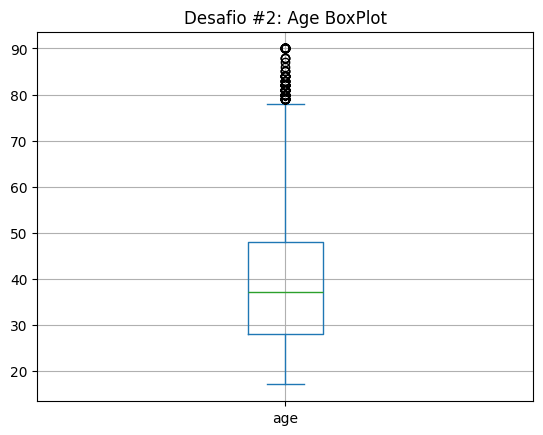

In [96]:
import matplotlib.pyplot as plt

plt.title('Desafio #2: Age BoxPlot')
dados_desafio.plot(kind='box', grid=True)
plt.show()
